11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 8s 23ms/step - loss: 0.2745 - val_loss: 0.1921
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1727 - val_loss: 0.1553
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1458 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1292 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1183 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1110 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1059 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1022 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0995 - val_loss: 0.0972
Epoch 10/50
235/235 [========

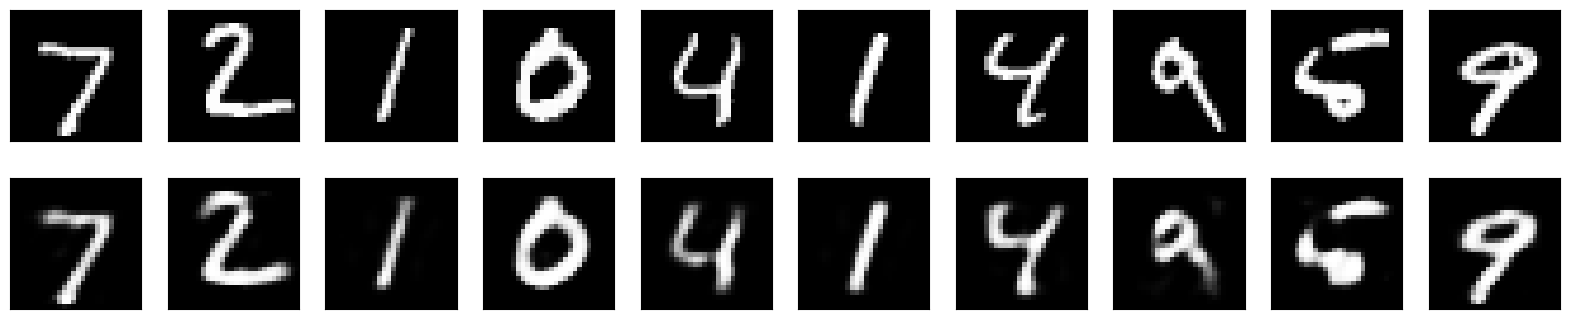

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the input images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 32
input_img = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = tf.keras.Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Use the autoencoder to reconstruct the X-ray image
reconstructed_images = autoencoder.predict(x_test)

# Plot the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
